In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [3]:
data = pd.read_csv('./Datos/ds_index_next.csv')

In [4]:
data.describe()

,YEAR,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,...,BS__TOTAL_CURRENT_LIABILITIES,IS_EPS_BASIC,VR_PE_RATIO,PRICE_START,PRICE_END,RETURNS,RISK,RETURNS_NEXT,INDEX_RETURNS,INDEX_RETURNS_NEXT
count,87438.000000,8.730500e+04,8.626500e+04,8.097300e+04,7.576600e+04,8.384600e+04,87438.000000,8.348000e+04,86057.000000,87438.000000,...,76417.000000,8.743800e+04,7.809400e+04,8.743800e+04,8.743800e+04,86279.000000,8.720900e+04,77782.000000,87438.000000,85967.000000
mean,2008.775956,5.243221e+03,-2.756467e+12,-1.751217e+02,-1.770327e+15,-2.329324e+03,3.922036,2.118796e+02,16.368412,-42.831673,...,1701.335848,-2.068567e+02,7.188280e+01,4.187331e+05,2.758710e+05,0.331649,1.944606e+05,0.295669,0.089132,0.084465
std,7.246814,2.172455e+04,5.318441e+14,1.546769e+05,2.280495e+17,3.368148e+05,2.511944,3.773860e+04,1783.761099,1744.059972,...,9625.733728,2.225226e+04,5.632267e+03,3.790511e+07,2.996345e+07,8.564182,1.721717e+07,8.190094,0.143191,0.138953
min,1978.000000,0.000000e+00,-1.117984e+17,-1.000000e+07,-5.372614e+19,-8.086880e+07,0.000000,0.000000e+00,0.000000,-276260.000000,...,-124.000000,-4.250000e+06,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,0.000000e+00,-1.000000,-0.375847,-0.375847
25%,2004.000000,2.436500e+01,-4.370000e+00,-2.650000e+00,-1.849750e+01,0.000000e+00,2.000000,4.800000e-01,0.750000,0.000000,...,3.842000,-8.999044e-02,0.000000e+00,2.490000e+00,2.310000e+00,-0.227468,3.123145e-01,-0.237386,-0.006928,0.036538
50%,2011.000000,2.944074e+02,6.030000e+00,7.620000e+00,9.980000e+00,4.090000e+00,4.000000,1.360000e+00,1.540000,1.710000,...,58.500000,2.368228e-01,1.229000e+01,1.023000e+01,1.017000e+01,0.000000,1.159081e+00,0.000000,0.112374,0.112374
75%,2015.000000,2.464000e+03,1.448000e+01,1.515000e+01,3.428750e+01,1.368000e+01,6.000000,3.430000e+00,3.030000,4.100000,...,560.343130,1.174007e+00,2.144000e+01,2.513000e+01,2.569000e+01,0.278905,3.074709e+00,0.290323,0.184150,0.184150
max,2018.000000,1.398351e+06,1.401827e+05,1.000000e+07,1.323554e+19,8.082500e+04,9.000000,1.000000e+07,500000.000000,106418.600000,...,754145.077720,5.508774e+05,1.171726e+06,6.384615e+09,6.423077e+09,1074.000000,3.459600e+09,1074.000000,0.341574,0.341574


Nos quedamos con las columnas mas significativas, eliminando las filas con NaNs

In [5]:
data = data.loc[data['VQ_MARKET_CAP'].notnull() & \
     data['CSR__ROE'].notnull() & \
     data['VR__EV_TO_EBIT'].notnull() & \
     data['CSR__ROC_JOEL_GREENBLATT'].notnull() & \
     data['CSR__OPERATING_MARGIN'].notnull() & \
     data['VQ__PIOTROSKI_F_SCORE'].notnull() & \
     data['VR__PS_RATIO'].notnull() & \
     data['VR__PB_RATIO'].notnull() & \
     data['VQ__ALTMAN_Z_SCORE'].notnull() & \
     data['CSR__ROA'].notnull() & \
     data['PSDA__EARNINGS_PER_SHARE_DILUTED'].notnull() & \
     data['CSR__ROIC'].notnull() & \
     data['CSR__GROSS_MARGIN'].notnull() & \
     data['VQ__YOY_EPS_GROWTH'].notnull() & \
     data['VQ__YOY_EBITDA_GROWTH'].notnull() & \
     data['PSDA__EBITDA_PER_SHARE'].notnull() & \
     data['PSDA__TOTAL_DEBT_PER_SHARE'].notnull() & \
     data['CSR__NET_MARGIN'].notnull() & \
     data['IS__REVENUE'].notnull() & \
     data['IS__NET_INCOME'].notnull() & \
     data['IS__COST_OF_GOODS_SOLD'].notnull() & \
     data['BS__TOTAL_EQUITY'].notnull() & \
     data['IS__EBITDA'].notnull() & \
     data['BS__TOTAL_ASSETS'].notnull() & \
     data['BS__LONG_TERM_DEBT'].notnull() & \
     data['BS__TOTAL_CURRENT_LIABILITIES'].notnull() & \
     data['RISK'].notnull() & \
     data['IS_EPS_BASIC'].notnull() & \
     data['VR_PE_RATIO'].notnull() & \
     data['RETURNS'].notnull() & \
     data['RETURNS_NEXT'].notnull()]

In [6]:
data.describe()

,YEAR,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,...,BS__TOTAL_CURRENT_LIABILITIES,IS_EPS_BASIC,VR_PE_RATIO,PRICE_START,PRICE_END,RETURNS,RISK,RETURNS_NEXT,INDEX_RETURNS,INDEX_RETURNS_NEXT
count,58125.000000,58125.000000,58125.00000,5.812500e+04,5.812500e+04,5.812500e+04,58125.000000,5.812500e+04,58125.000000,58125.000000,...,58125.000000,5.812500e+04,58125.000000,5.812500e+04,5.812500e+04,58125.000000,5.812500e+04,58125.000000,58125.000000,58125.000000
mean,2007.570202,5858.110883,-29.07345,-4.432712e+02,-8.946953e+14,-1.274308e+03,4.707957,2.676343e+02,8.899925,-12.353355,...,1970.441113,-2.194783e+02,35.781980,2.949139e+04,1.810191e+04,0.245847,8.613350e+04,0.229777,0.083672,0.085803
std,7.327974,22060.493551,3400.20271,1.674443e+05,1.210461e+17,2.253105e+05,2.174315,4.513367e+04,302.029521,851.046658,...,10124.705458,2.101178e+04,1152.921293,3.091433e+06,2.493480e+06,5.901228,1.484416e+07,5.362111,0.148910,0.145380
min,1978.000000,0.000000,-608743.56000,-1.000000e+07,-1.637149e+19,-5.421880e+07,0.000000,0.000000e+00,0.000000,-86281.470000,...,-124.000000,-4.250000e+06,0.000000,1.000000e-02,0.000000e+00,-1.000000,0.000000e+00,-1.000000,-0.375847,-0.375847
25%,2003.000000,51.000000,-0.53000,0.000000e+00,0.000000e+00,0.000000e+00,4.000000,4.700000e-01,0.870000,0.950000,...,10.666000,-4.335761e-02,0.000000,3.460000e+00,3.330000e+00,-0.211594,4.318490e-01,-0.216216,-0.006928,-0.006928
50%,2010.000000,543.150000,7.73000,9.700000e+00,1.496000e+01,7.550000e+00,5.000000,1.170000e+00,1.710000,2.410000,...,104.354000,3.400000e-01,12.470000,1.145000e+01,1.144000e+01,0.007765,1.360341e+00,0.012251,0.112374,0.112374
75%,2014.000000,3146.795200,16.51000,1.635000e+01,4.065000e+01,1.656000e+01,6.000000,2.860000e+00,3.210000,4.620000,...,767.750000,1.260000e+00,22.220000,2.667000e+01,2.731000e+01,0.293286,3.332586e+00,0.302528,0.193337,0.184150
max,2017.000000,626546.038000,140182.66000,1.000000e+07,1.323554e+19,8.082500e+04,9.000000,1.000000e+07,36974.790000,43042.530000,...,754145.077720,3.150000e+05,250080.000000,4.400000e+08,4.290000e+08,999.000000,3.459600e+09,999.000000,0.341574,0.341574


### Previsualizacion de los datos

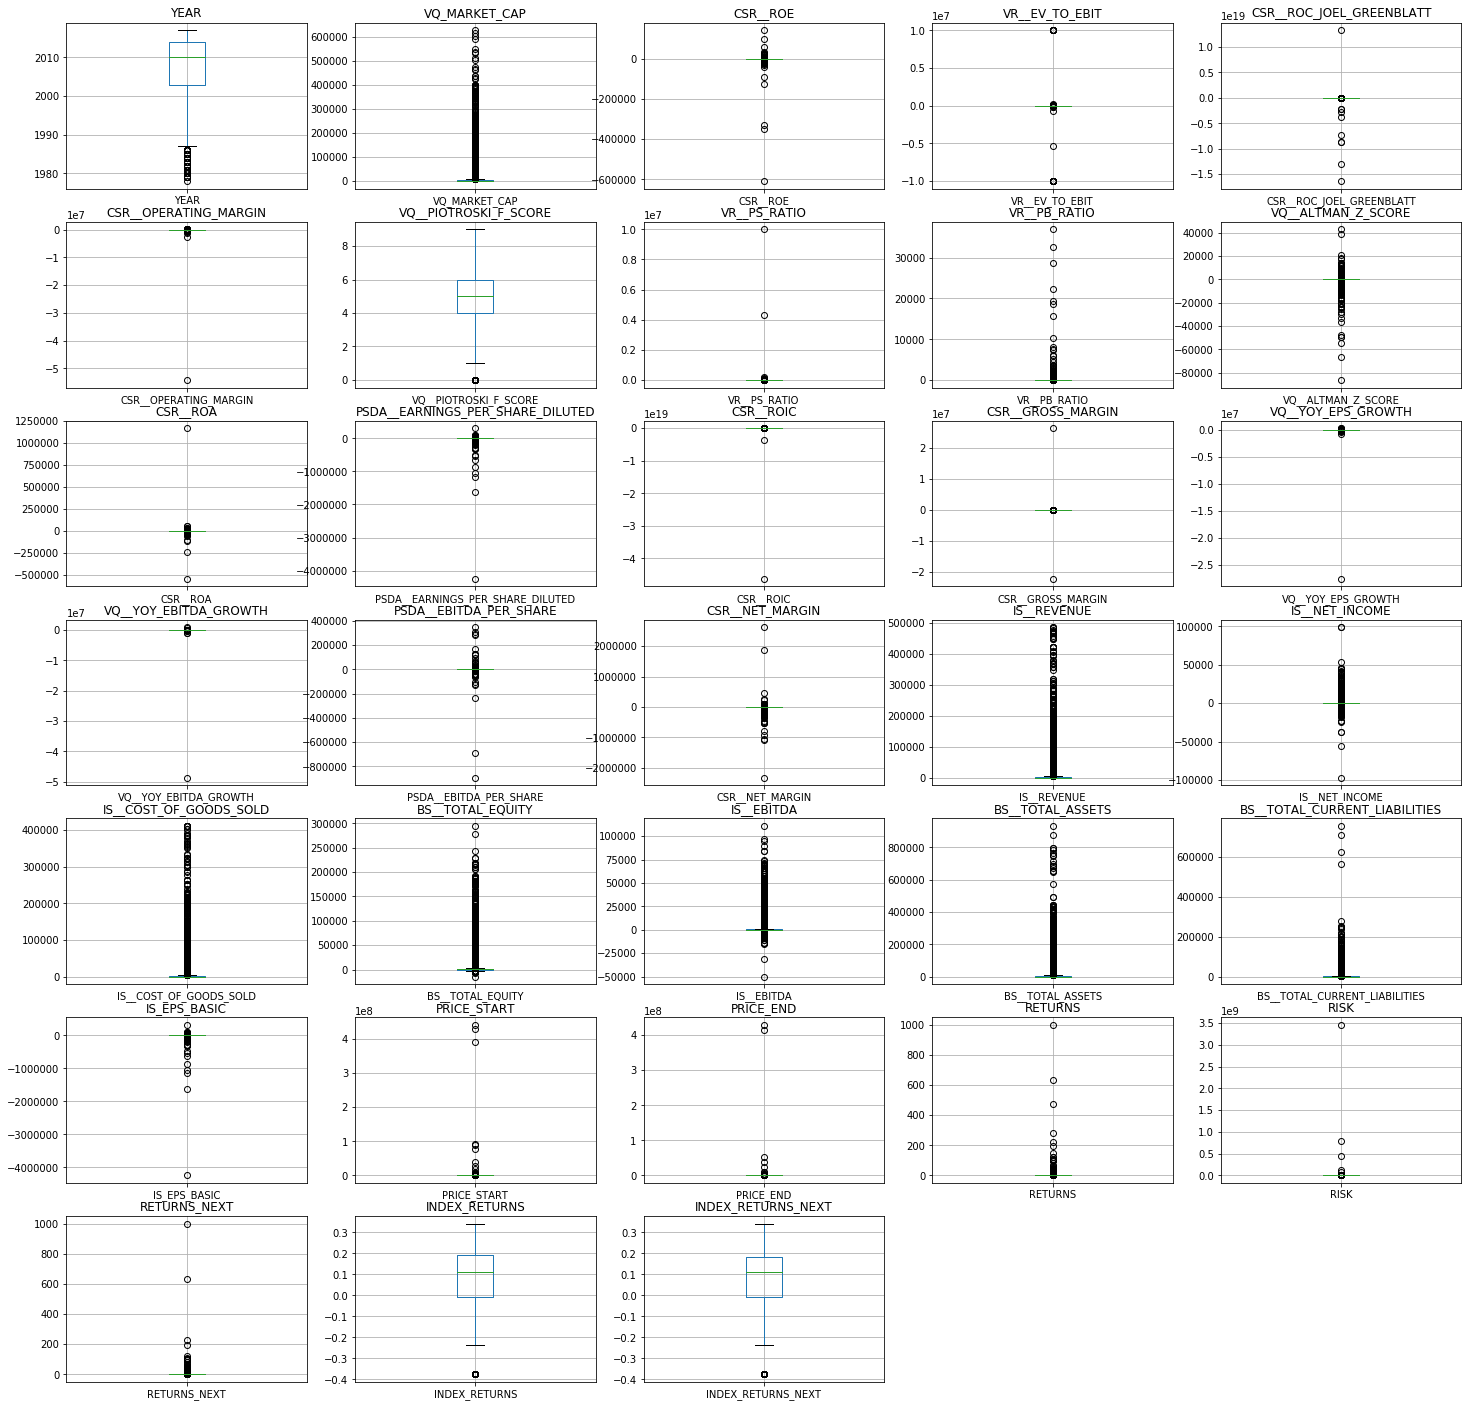

In [111]:
plt.figure(figsize = (25, 25))

for i, feature in enumerate(data.select_dtypes(include = [np.number]).columns):
    plt.subplot(7, 5, i + 1)
    data.boxplot(column = feature)
    plt.title(feature)

plt.show()

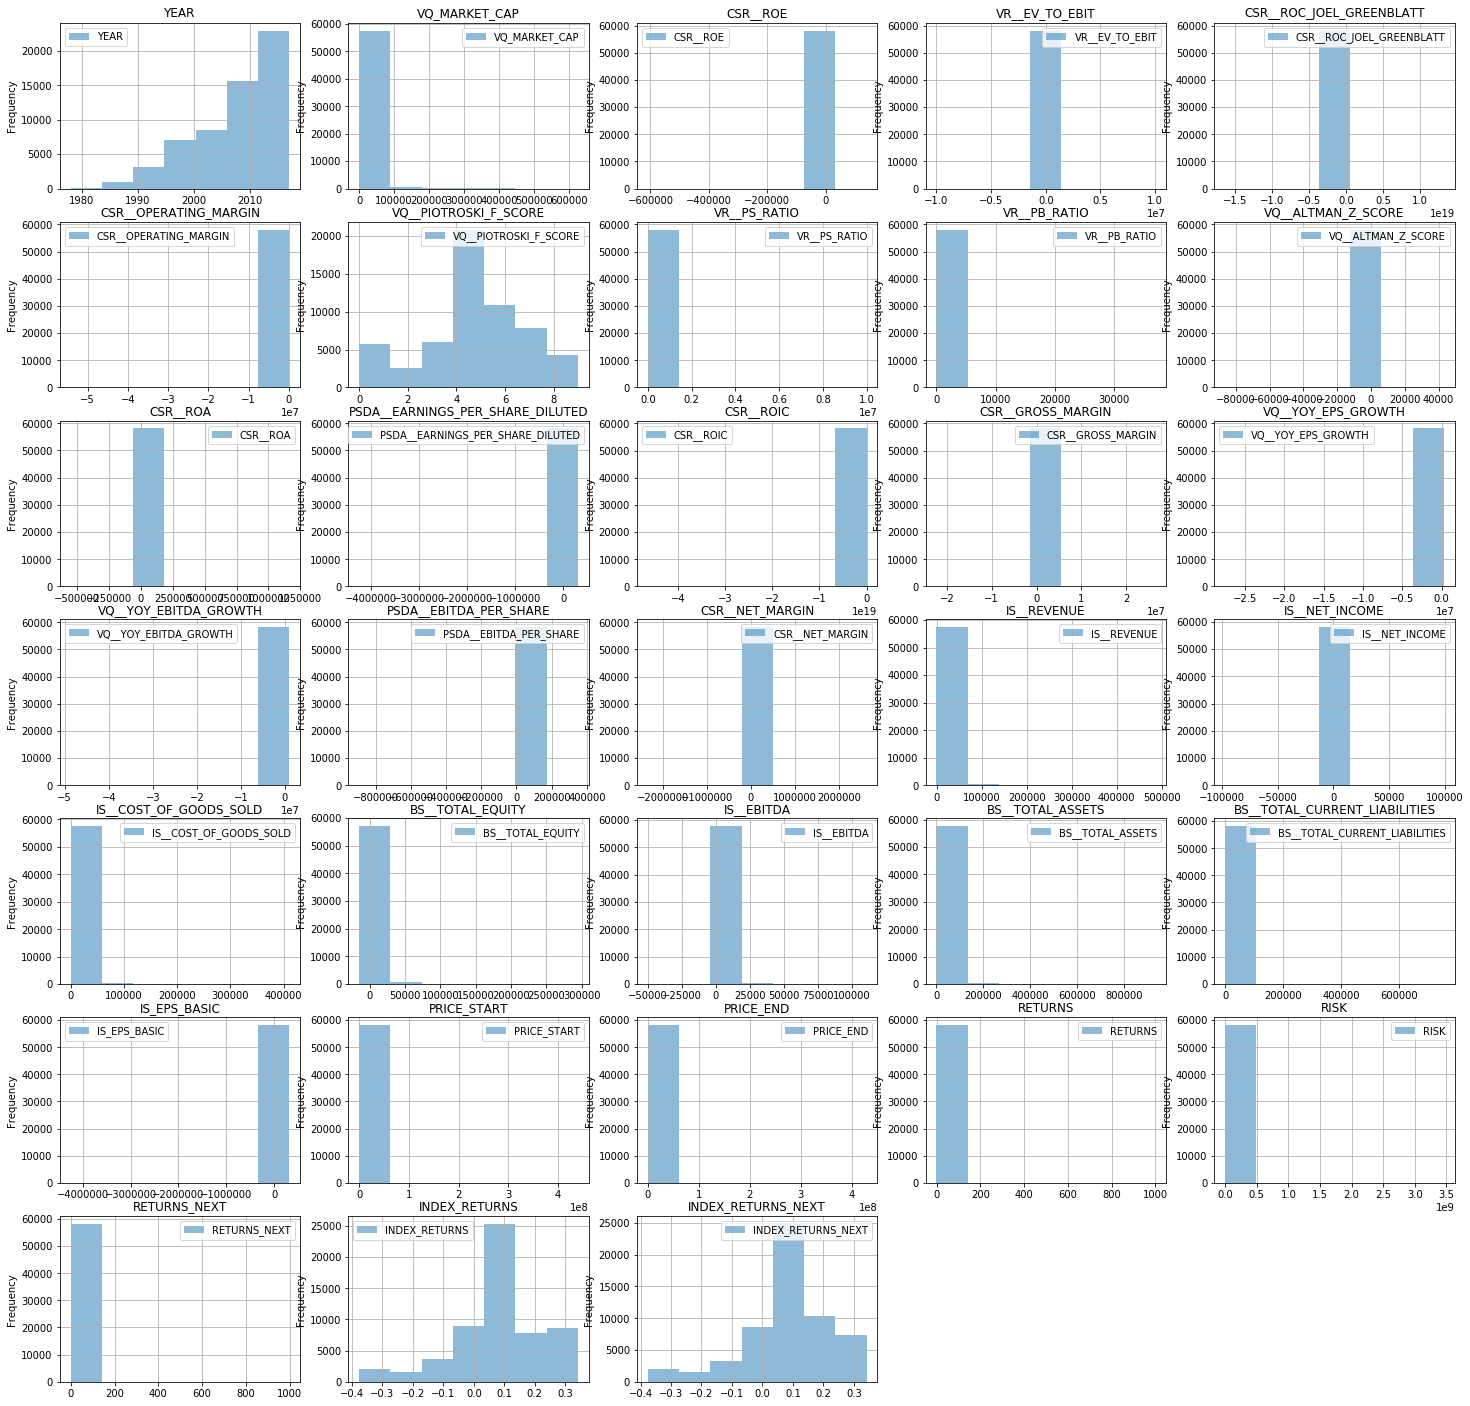

In [112]:
plt.figure(figsize = (25, 25))

for i, feature in enumerate(data.select_dtypes(include = [np.number]).columns):
    plt.subplot(7, 5, i + 1)
    data[feature].plot.hist(alpha = 0.5, bins = 7, grid = True)
    plt.legend()
    plt.title(feature)

plt.show()

Observamos la mayoria de las variables tienen un numero bastante elevado de outliers

Mostramos la correlación entre variables que tendremos que tener en cuenta a la hora de seleccionar las variables

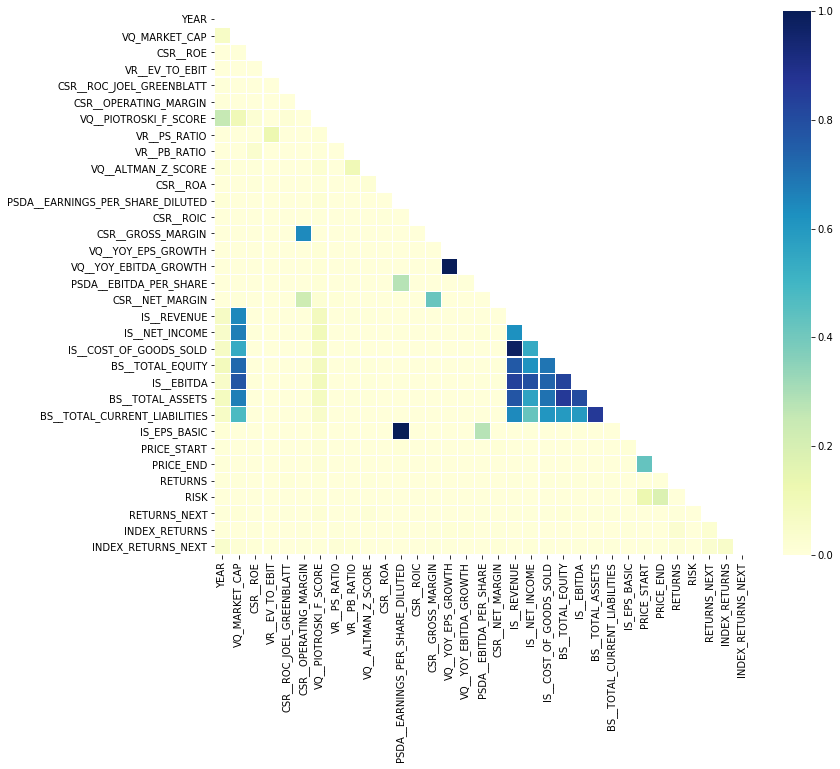

In [113]:
corr = np.abs(data.corr())

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (12, 10))

sns.heatmap(corr, mask = mask, vmin = 0.0, vmax = 1.0, center = 0.5,
           linewidths = .1, cmap = 'YlGnBu')

plt.show()

## VARIABLE TARGET

Nuestra target es RETURNS_vs_INDEX_NEXT, que indica si la rentabilidad obtenida por una empresa durante un año supera en ese mismo periodo a la rentabilidad del indice total. Como esta variable depende de la rentabilidad de la empresa y del indice, comenzaremos con el estudio de ambas variables

#### RETURNS_NEXT

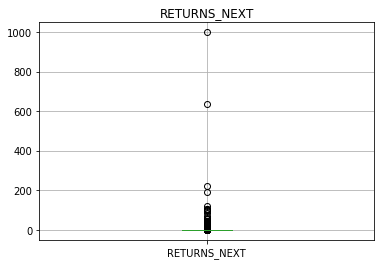

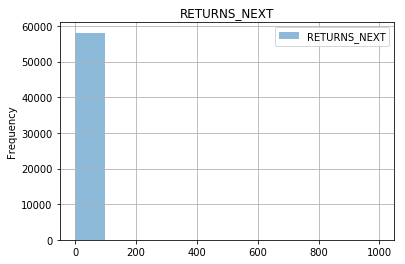

count    58125.000000
mean         0.229777
std          5.362111
min         -1.000000
25%         -0.216216
50%          0.012251
75%          0.302528
max        999.000000
Name: RETURNS_NEXT, dtype: float64

In [7]:
data.boxplot('RETURNS_NEXT')
plt.title('RETURNS_NEXT')
plt.show()

data['RETURNS_NEXT'].plot.hist(alpha = 0.5, bins = 10, grid = True)
plt.legend()
plt.title('RETURNS_NEXT')
plt.show()

data['RETURNS_NEXT'].describe()

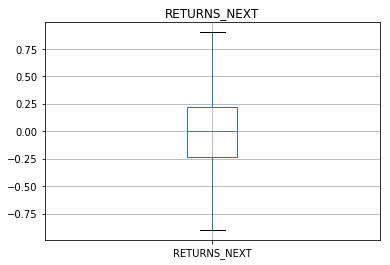

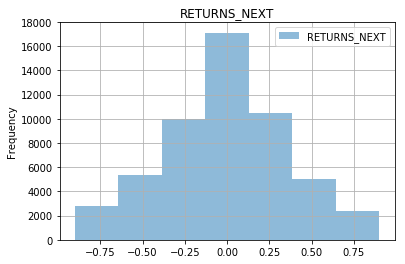

53105

In [8]:
df_aux = data[data['RETURNS_NEXT'] < 0.9]
df_aux = df_aux[data['RETURNS_NEXT'] > -0.9]

df_aux.boxplot('RETURNS_NEXT')
plt.title('RETURNS_NEXT')
plt.show()

df_aux['RETURNS_NEXT'].plot.hist(alpha = 0.5, bins = 7, grid = True)
plt.legend()
plt.title('RETURNS_NEXT')
plt.show()

df_aux['RETURNS_NEXT'].describe()

len(df_aux)

Ajustamos los valores de la target, eliminando el maximo numero de outliers posible

In [9]:
data = data[data['RETURNS_NEXT'] < 0.9]
data = data[data['RETURNS_NEXT'] > -0.9]
len(data)

53105

Considero que el tener una rentabilidad a cero es consecuencia de una falta en la calidad del dato, por lo que elimino tambien las filas con rentabilidad a cero.

In [10]:
data = data[data['RETURNS_NEXT'] != 0]
len(data)

50259

#### INDEX_RETURNS_NEXT

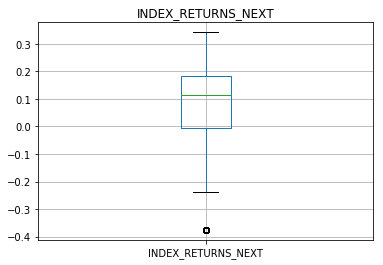

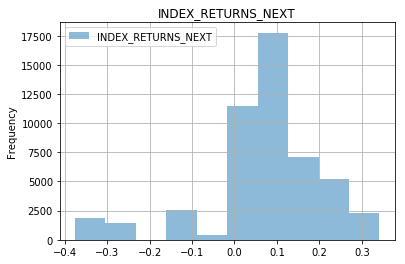

count    50259.000000
mean         0.081706
std          0.147774
min         -0.375847
25%         -0.006928
50%          0.112374
75%          0.184150
max          0.341574
Name: INDEX_RETURNS_NEXT, dtype: float64

In [11]:
data.boxplot('INDEX_RETURNS_NEXT')
plt.title('INDEX_RETURNS_NEXT')
plt.show()

data['INDEX_RETURNS_NEXT'].plot.hist(alpha = 0.5, bins = 10, grid = True)
plt.legend()
plt.title('INDEX_RETURNS_NEXT')
plt.show()

data['INDEX_RETURNS_NEXT'].describe()

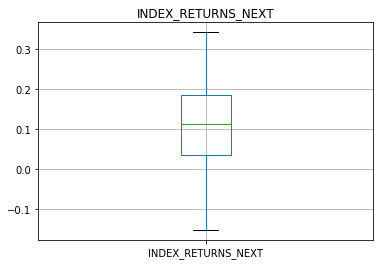

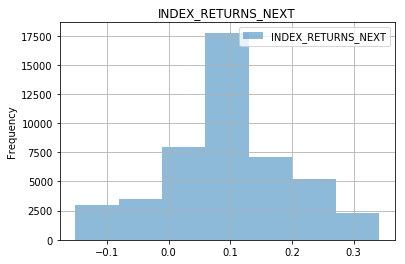

46892

In [12]:
df_aux = data[data['INDEX_RETURNS_NEXT'] > -0.2]

df_aux.boxplot('INDEX_RETURNS_NEXT')
plt.title('INDEX_RETURNS_NEXT')
plt.show()

df_aux['INDEX_RETURNS_NEXT'].plot.hist(alpha = 0.5, bins = 7, grid = True)
plt.legend()
plt.title('INDEX_RETURNS_NEXT')
plt.show()

df_aux['INDEX_RETURNS_NEXT'].describe()

len(df_aux)

In [13]:
data = data[data['INDEX_RETURNS_NEXT'] > -0.2]
len(data)

46892

Codificamos la variable target, y la diferencia del año en curso

In [14]:
le = LabelEncoder()
data['RETURNS_vs_INDEX_NEXT'] = le.fit_transform(data['RETURNS_vs_INDEX_NEXT'])

In [15]:
data.head()

,YEAR,CODE,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,...,RISK,INDUSTRY01,INDUSTRY02,RETURNS_NEXT,RETURNS_CAT,RETURNS_NEXT_CAT,INDEX_RETURNS,INDEX_RETURNS_NEXT,RETURNS_vs_INDEX,RETURNS_vs_INDEX_NEXT
0,2014,ETE,31002.7009,72.22,28.98,8.00,5.10,7,0.56,46.73,...,3.472920,NaN,NaN,-0.512675,POSITIVE,NEGATIVE,0.123866,-0.006928,WINS,0
1,2010,ETE,8712.4952,317.83,24.53,9.21,15.92,5,1.33,72.37,...,0.730981,NaN,NaN,0.045082,POSITIVE,POSITIVE,0.110019,-0.011220,WINS,1
2,2015,ETE,14384.6808,0.00,28.67,5.90,7.28,7,0.41,0.00,...,6.159618,NaN,NaN,0.897959,NEGATIVE,POSITIVE,-0.006928,0.112374,LOSES,1
3,2012,ETE,12732.3534,27.89,19.82,11.46,8.02,5,0.73,6.03,...,0.649843,NaN,NaN,0.657980,POSITIVE,POSITIVE,0.116776,0.263905,WINS,1
5,2016,ETE,20216.6045,0.00,30.44,5.63,9.07,4,0.61,0.00,...,4.090011,NaN,NaN,-0.092850,POSITIVE,NEGATIVE,0.112374,0.184150,WINS,0


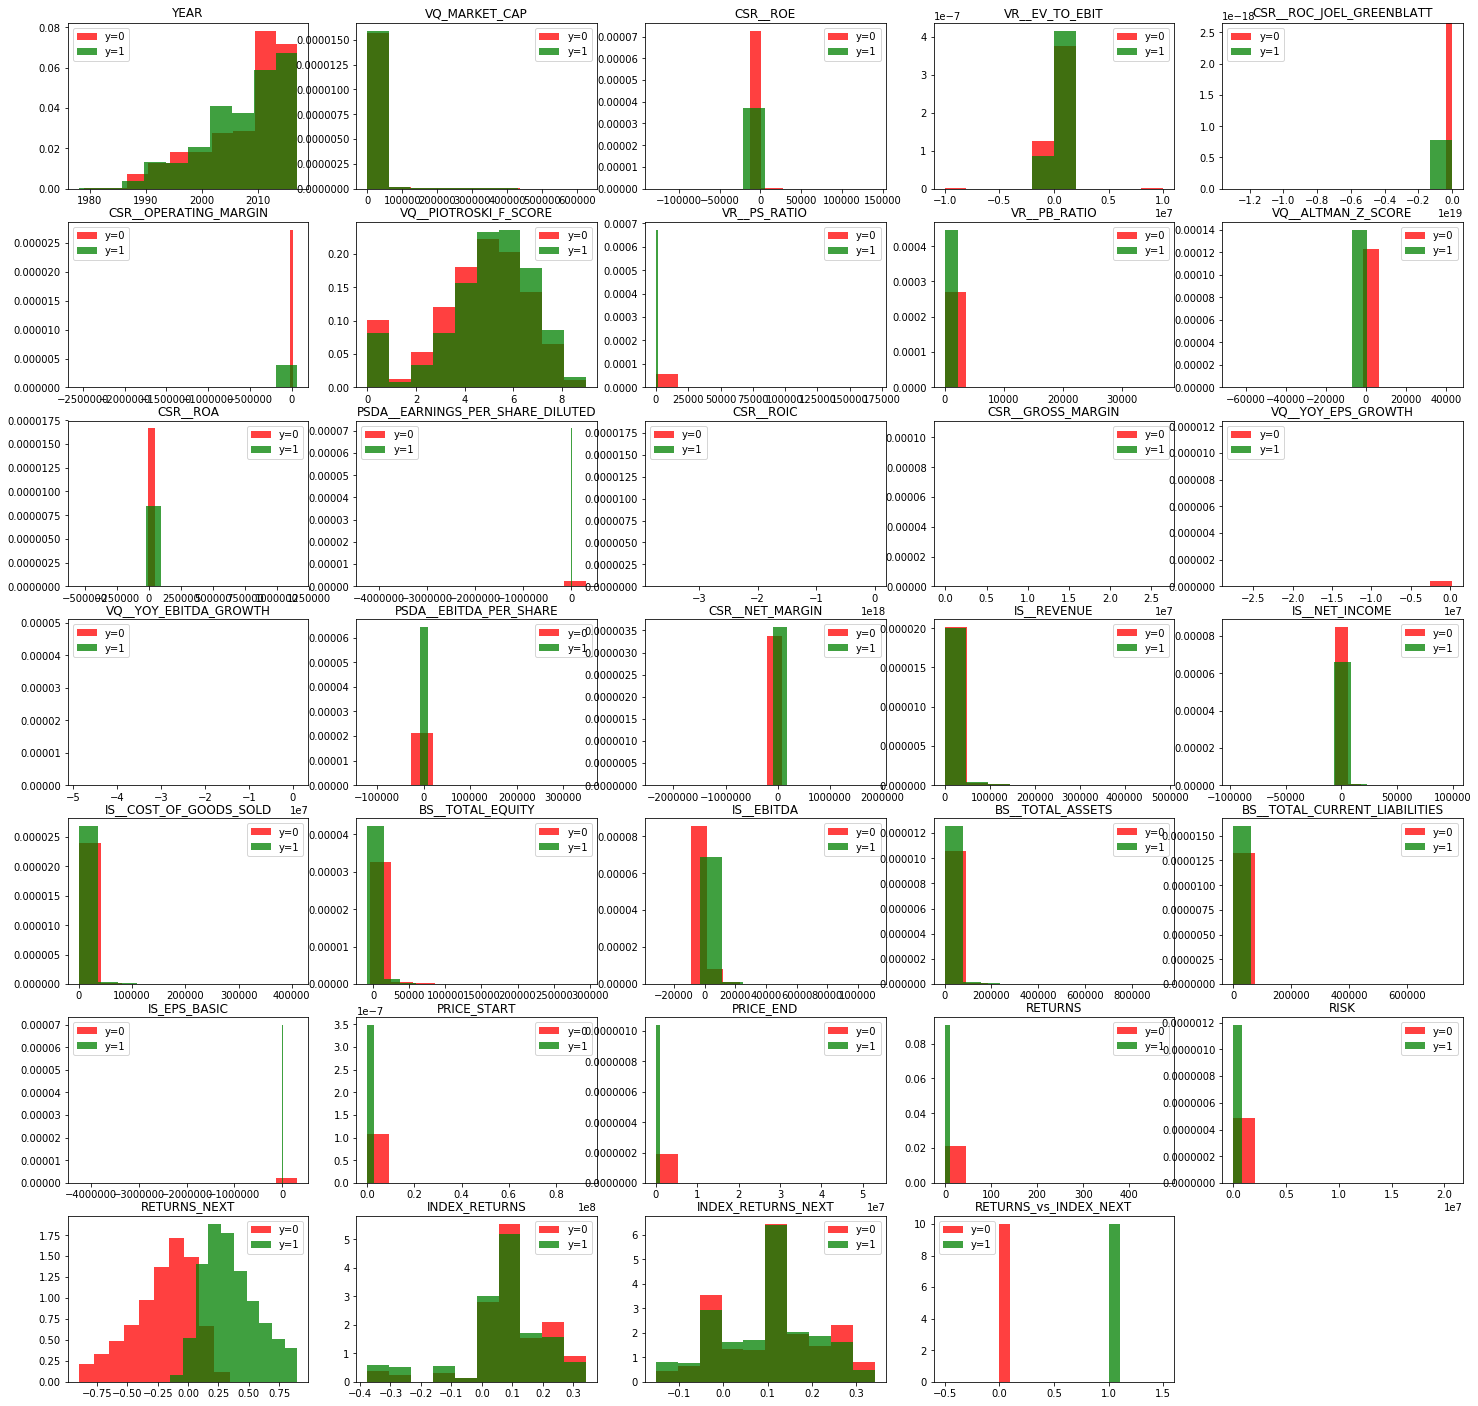

In [123]:
df_idx_0 = data['RETURNS_vs_INDEX_NEXT'] == 0
df_idx_1 = data['RETURNS_vs_INDEX_NEXT'] == 1

plt.figure(figsize = (25, 25))
for i, feature in enumerate(data.select_dtypes(include = [np.number]).columns):
    plt.subplot(7, 5, i + 1)
    plt.hist(data.ix[df_idx_0, feature], normed = 1, facecolor='red', alpha = 0.75, label ='y=0')
    plt.hist(data.ix[df_idx_1, feature], normed = 1, facecolor='green', alpha = 0.75, label ='y=1')
    plt.legend()
    plt.title(feature)

plt.show()

Segun vemos, parece que ninguna de las variables afecta el resultado de la target, por lo que, en principio, no haremos tratamiento de outlieres y probaremos algunos algoritmos a ver que resultado nos dan

### PREPARAMOS LOS DATOS

In [16]:
lista_cols = ['VQ_MARKET_CAP',      
     'CSR__ROE',
     'VR__EV_TO_EBIT',
     'CSR__ROC_JOEL_GREENBLATT',
     'CSR__OPERATING_MARGIN',
     'VQ__PIOTROSKI_F_SCORE',
     'VR__PS_RATIO',
     'VR__PB_RATIO',
     'VQ__ALTMAN_Z_SCORE',
     'CSR__ROA',
     'PSDA__EARNINGS_PER_SHARE_DILUTED',
     'CSR__ROIC',
     'CSR__GROSS_MARGIN',
     'VQ__YOY_EPS_GROWTH',
     'VQ__YOY_EBITDA_GROWTH',
     'PSDA__EBITDA_PER_SHARE',
     'CSR__NET_MARGIN',
     'IS__REVENUE',
     'IS__NET_INCOME',
     'IS__COST_OF_GOODS_SOLD',
     'BS__TOTAL_EQUITY',
     'IS__EBITDA',
     'BS__TOTAL_ASSETS',
     'BS__TOTAL_CURRENT_LIABILITIES',
     'IS_EPS_BASIC',
     'VR_PE_RATIO',
     'RETURNS']

In [17]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [18]:
data2016 = data[data['YEAR'] == 2016]

In [19]:
data2016.describe()

,YEAR,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,...,IS_EPS_BASIC,VR_PE_RATIO,PRICE_START,PRICE_END,RETURNS,RISK,RETURNS_NEXT,INDEX_RETURNS,INDEX_RETURNS_NEXT,RETURNS_vs_INDEX_NEXT
count,3801.0,3801.000000,3801.000000,3.801000e+03,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,...,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3801.000000,3.801000e+03,3.801000e+03,3801.000000
mean,2016.0,8104.613703,15.901055,2.619672e+03,-298.393744,-99.043689,5.238885,7.148043,10.283428,-17.379918,...,5.476106,36.918919,81.196448,79.442526,0.323359,12.973741,0.098071,1.123737e-01,1.841503e-01,0.401210
std,0.0,26547.123935,1629.120285,1.622037e+05,13912.710306,2249.484883,1.704722,90.628314,364.786608,1018.143276,...,269.298838,246.758614,2167.039430,2691.625356,4.842353,393.598228,0.341879,2.276257e-15,1.329667e-14,0.490208
min,2016.0,0.000000,-20047.520000,-5.533473e+04,-636200.000000,-125500.000000,0.000000,0.000000,0.000000,-36360.410000,...,-160.622000,0.000000,0.010000,0.000000,-1.000000,0.000000,-0.896552,1.123737e-01,1.841503e-01,0.000000
25%,2016.0,248.492000,0.000000,2.490000e+00,0.160000,1.030000,4.000000,0.640000,1.010000,1.060000,...,-0.014626,0.000000,2.940000,3.100000,-0.103516,0.355587,-0.111111,1.123737e-01,1.841503e-01,0.000000
50%,2016.0,1554.307800,7.470000,1.253000e+01,16.010000,8.400000,5.000000,1.430000,1.860000,2.240000,...,0.390295,14.940000,11.580000,12.500000,0.066522,1.298710,0.111111,1.123737e-01,1.841503e-01,0.000000
75%,2016.0,5813.569000,15.300000,1.954000e+01,44.160000,18.000000,6.000000,3.150000,3.450000,4.040000,...,1.494382,24.960000,29.550000,32.470000,0.317908,3.389688,0.321908,1.123737e-01,1.841503e-01,1.000000
max,2016.0,603254.018500,96660.930000,1.000000e+07,282328.100000,15123.910000,9.000000,5220.000000,22370.000000,38709.910000,...,16595.000000,11540.000000,117500.000000,165500.000000,283.285714,18711.123750,0.896873,1.123737e-01,1.841503e-01,1.000000


In [20]:
data2016.shape

(3801, 43)

In [21]:
for col in lista_cols:
    data2016 = remove_outlier(data2016, col)

In [22]:
data2016.describe()

,YEAR,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,...,IS_EPS_BASIC,VR_PE_RATIO,PRICE_START,PRICE_END,RETURNS,RISK,RETURNS_NEXT,INDEX_RETURNS,INDEX_RETURNS_NEXT,RETURNS_vs_INDEX_NEXT
count,448.0,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,...,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,448.000000,4.480000e+02,4.480000e+02,448.000000
mean,2016.0,1824.027606,9.834732,14.574978,24.879397,10.394777,5.750000,1.277478,1.953348,3.174509,...,0.918710,20.320446,18.182344,20.351585,0.093575,2.004436,0.121538,1.123737e-01,1.841503e-01,0.412946
std,0.0,1804.039480,5.367781,7.291427,19.173392,6.484748,1.320972,0.791343,1.124544,1.503608,...,0.828854,10.171732,17.569012,19.870558,0.273202,2.265401,0.311072,6.807718e-16,7.780249e-16,0.492914
min,2016.0,0.000000,-7.720000,-12.550000,-8.220000,-4.160000,3.000000,0.020000,0.000000,0.000000,...,-0.950000,0.000000,0.080000,0.080000,-0.622542,0.000000,-0.821176,1.123737e-01,1.841503e-01,0.000000
25%,2016.0,457.525875,6.317500,10.147500,12.395000,5.947500,5.000000,0.680000,1.137500,2.117500,...,0.263640,13.565000,4.672500,4.640000,-0.088222,0.324917,-0.077766,1.123737e-01,1.841503e-01,0.000000
50%,2016.0,1255.032300,9.550000,13.615000,19.155000,9.160000,6.000000,1.120000,1.750000,3.025000,...,0.715000,19.085000,13.875000,14.160000,0.065127,1.275925,0.111397,1.123737e-01,1.841503e-01,0.000000
75%,2016.0,2582.330100,12.975000,17.912500,31.390000,13.650000,7.000000,1.720000,2.577500,4.157500,...,1.443707,25.987500,25.982500,30.107500,0.268175,2.916111,0.329521,1.123737e-01,1.841503e-01,1.000000
max,2016.0,9118.771200,25.080000,40.520000,108.820000,34.610000,9.000000,3.840000,5.100000,7.220000,...,3.290000,51.500000,114.080000,100.950000,0.775426,13.687582,0.872779,1.123737e-01,1.841503e-01,1.000000


In [23]:
# Preparamos los datos para 2016
X_2016 = data2016[['VQ_MARKET_CAP',
                     'CSR__ROE',
                     'VR__EV_TO_EBIT',
                     'CSR__ROC_JOEL_GREENBLATT',
                     'CSR__OPERATING_MARGIN',
                     'VQ__PIOTROSKI_F_SCORE',
                     'VR__PS_RATIO',
                     'VR__PB_RATIO',
                     'VQ__ALTMAN_Z_SCORE',
                     'CSR__ROA',
                     'PSDA__EARNINGS_PER_SHARE_DILUTED',
                     'CSR__ROIC',
                     'CSR__GROSS_MARGIN',
                     'VQ__YOY_EPS_GROWTH',
                     'VQ__YOY_EBITDA_GROWTH',
                     'PSDA__EBITDA_PER_SHARE',
                     'CSR__NET_MARGIN',
                     'IS__REVENUE',
                     'IS__NET_INCOME',
                     'IS__COST_OF_GOODS_SOLD',
                     'BS__TOTAL_EQUITY',
                     'IS__EBITDA',
                     'BS__TOTAL_ASSETS',
                     'BS__TOTAL_CURRENT_LIABILITIES',
                     'IS_EPS_BASIC',
                     'VR_PE_RATIO',
                     'RETURNS']].values

y_2016 = data2016['RETURNS_vs_INDEX_NEXT'].values

In [24]:
X_2016.shape

(448, 27)

In [25]:
data_before2016 = data2016 = data[data['YEAR'] < 2016]

In [26]:
data_before2016.describe()

,YEAR,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,...,IS_EPS_BASIC,VR_PE_RATIO,PRICE_START,PRICE_END,RETURNS,RISK,RETURNS_NEXT,INDEX_RETURNS,INDEX_RETURNS_NEXT,RETURNS_vs_INDEX_NEXT
count,42257.000000,42257.000000,42257.000000,4.225700e+04,4.225700e+04,4.225700e+04,42257.000000,42257.000000,42257.000000,42257.000000,...,4.225700e+04,42257.000000,4.225700e+04,4.225700e+04,42257.000000,4.225700e+04,42257.000000,42257.000000,42257.000000,42257.000000
mean,2006.745841,6268.497384,-3.817882,-5.324465e+00,-6.335177e+14,-2.610406e+02,4.745817,19.749894,8.119963,-3.433868,...,-1.778038e+02,38.401533,7.073533e+03,3.323918e+03,0.206643,1.694432e+03,0.010008,0.094066,0.104452,0.393000
std,7.370089,22680.228052,1172.513210,1.685592e+05,7.813284e+16,1.331215e+04,2.197577,896.537629,257.316645,738.457911,...,2.261974e+04,1344.632447,6.536545e+05,2.876550e+05,2.907024,1.388262e+05,0.365945,0.151768,0.107353,0.488423
min,1978.000000,0.000000,-127909.090000,-1.000000e+07,-1.298190e+19,-2.548100e+06,0.000000,0.000000,0.000000,-66439.660000,...,-4.250000e+06,0.000000,1.000000e-02,0.000000e+00,-1.000000,0.000000e+00,-0.900000,-0.375847,-0.151569,0.000000
25%,2002.000000,68.160000,0.000000,0.000000e+00,0.000000e+00,9.700000e-01,4.000000,0.500000,0.950000,1.050000,...,-2.000000e-02,0.000000,4.440000e+00,4.380000e+00,-0.200000,5.554649e-01,-0.226923,-0.006928,-0.006928,0.000000
50%,2009.000000,631.867500,8.520000,1.009000e+01,1.636000e+01,8.210000e+00,5.000000,1.200000,1.780000,2.510000,...,4.297539e-01,13.190000,1.262000e+01,1.286000e+01,0.029412,1.493700e+00,0.016088,0.116776,0.112374,0.000000
75%,2013.000000,3493.024500,17.120000,1.645000e+01,4.242000e+01,1.735000e+01,6.000000,2.870000,3.250000,4.740000,...,1.360000e+00,22.540000,2.760000e+01,2.865000e+01,0.301475,3.443379e+00,0.250000,0.196716,0.193337,1.000000
max,2015.000000,626546.038000,140182.660000,1.000000e+07,3.733556e+05,6.900476e+04,9.000000,169262.020000,36974.790000,43042.530000,...,3.150000e+05,250080.000000,9.285714e+07,5.285714e+07,474.000000,2.071812e+07,0.900000,0.341574,0.341574,1.000000


In [27]:
data_before2016.shape

(42257, 43)

In [28]:
for col in lista_cols:
    data_before2016 = remove_outlier(data_before2016, col)

In [29]:
data_before2016.shape

(4973, 43)

In [30]:
data_before2016.describe()

,YEAR,VQ_MARKET_CAP,CSR__ROE,VR__EV_TO_EBIT,CSR__ROC_JOEL_GREENBLATT,CSR__OPERATING_MARGIN,VQ__PIOTROSKI_F_SCORE,VR__PS_RATIO,VR__PB_RATIO,VQ__ALTMAN_Z_SCORE,...,IS_EPS_BASIC,VR_PE_RATIO,PRICE_START,PRICE_END,RETURNS,RISK,RETURNS_NEXT,INDEX_RETURNS,INDEX_RETURNS_NEXT,RETURNS_vs_INDEX_NEXT
count,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,...,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000,4973.000000
mean,2003.725719,550.727327,10.908687,11.336582,25.859552,9.308055,5.002212,0.927788,1.690131,3.537963,...,0.717520,16.469847,12.834593,12.990782,0.050335,1.517674,0.078576,0.098303,0.115866,0.444802
std,8.258372,668.890689,6.561994,6.473892,18.755355,5.725423,2.166397,0.679664,0.988751,1.947962,...,0.600628,9.051781,31.862263,30.275050,0.334586,2.181834,0.338244,0.163146,0.120591,0.496994
min,1981.000000,0.000000,-14.550000,-16.900000,-47.690000,-12.110000,0.000000,0.000000,0.000000,-2.130000,...,-1.110000,0.000000,0.030000,0.020000,-0.834606,0.000000,-0.886076,-0.375847,-0.151569,0.000000
25%,1997.000000,73.719200,6.670000,7.710000,12.560000,5.320000,4.000000,0.430000,1.010000,2.220000,...,0.250000,11.130000,4.240000,4.060000,-0.169785,0.465966,-0.143960,-0.006928,0.036538,0.000000
50%,2004.000000,294.426900,10.520000,10.920000,21.010000,8.360000,5.000000,0.770000,1.570000,3.380000,...,0.590000,15.990000,9.750000,9.660000,0.024793,1.050696,0.069182,0.116776,0.116776,0.000000
75%,2011.000000,780.626400,14.870000,14.490000,34.560000,12.110000,6.000000,1.280000,2.260000,4.840000,...,1.100000,21.650000,17.570000,17.890000,0.250751,2.021996,0.293769,0.223194,0.196716,1.000000
max,2015.000000,5078.801000,39.690000,38.080000,101.180000,34.800000,9.000000,3.310000,4.630000,8.550000,...,2.440000,42.500000,2125.200000,2000.000000,0.970000,105.037042,0.899336,0.341574,0.341574,1.000000


In [31]:
# Preparamos los datos para anteriores a 2016
X = data_before2016[['VQ_MARKET_CAP',
                     'CSR__ROE',
                     'VR__EV_TO_EBIT',
                     'CSR__ROC_JOEL_GREENBLATT',
                     'CSR__OPERATING_MARGIN',
                     'VQ__PIOTROSKI_F_SCORE',
                     'VR__PS_RATIO',
                     'VR__PB_RATIO',
                     'VQ__ALTMAN_Z_SCORE',
                     'CSR__ROA',
                     'PSDA__EARNINGS_PER_SHARE_DILUTED',
                     'CSR__ROIC',
                     'CSR__GROSS_MARGIN',
                     'VQ__YOY_EPS_GROWTH',
                     'VQ__YOY_EBITDA_GROWTH',
                     'PSDA__EBITDA_PER_SHARE',
                     'CSR__NET_MARGIN',
                     'IS__REVENUE',
                     'IS__NET_INCOME',
                     'IS__COST_OF_GOODS_SOLD',
                     'BS__TOTAL_EQUITY',
                     'IS__EBITDA',
                     'BS__TOTAL_ASSETS',
                     'BS__TOTAL_CURRENT_LIABILITIES',
                     'IS_EPS_BASIC',
                     'VR_PE_RATIO',
                     'RETURNS']].values

y = data_before2016['RETURNS_vs_INDEX_NEXT'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [32]:
X_train.shape

(3978, 27)

In [33]:
X_test.shape

(995, 27)

### Regresion Logistica

best mean cross-validation score: 0.558
best parameters: {'C': 20.6913808111479}


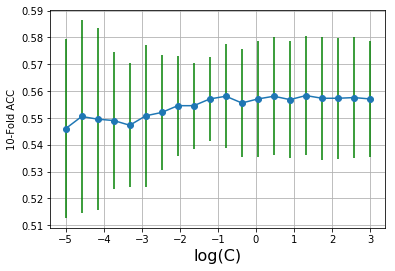

In [34]:
vectorC = np.logspace(-5, 3, 20)
param_grid = {'C': vectorC}

grid = GridSearchCV(LogisticRegression(random_state = 0, class_weight = 'balanced'),
                    scoring = 'accuracy',
                    param_grid = param_grid,
                    cv = 10)

grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
std_scores = grid.cv_results_['std_test_score']
plt.errorbar(np.log10(vectorC), scores, yerr = std_scores, fmt = 'o-', ecolor = 'g')
plt.xlabel('log(C)', fontsize = 16)
plt.ylabel('10-Fold ACC')
plt.grid()
plt.show()

In [35]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

def calcula_metricas(confmat):
    tn, fp, fn, tp = confmat.ravel()

    acc = (tp+tn)/(tn + fp + fn + tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))

    print('ACC: ', acc)
    print('SEN: ', sen)
    print('ESP: ', esp)
    print('PPV: ', ppv)
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1, 6], [1, 1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

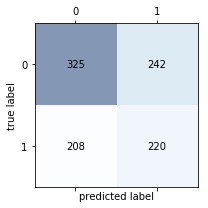

ACC:  0.5477386934673367
SEN:  0.514018691588785
ESP:  0.5731922398589065
PPV:  0.47619047619047616
FSC:  0.49438202247191004


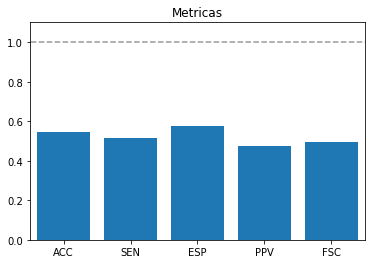

In [36]:
lr = LogisticRegression(random_state = 0, C = grid.best_params_['C'], class_weight = 'balanced').fit(X_train, y_train)
y_pred = lr.predict(X_test)

confmat1_test = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confmat1_test)
calcula_metricas(confmat1_test)

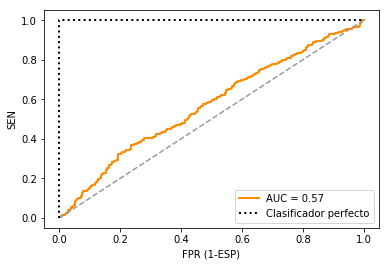

In [37]:
y_prob = lr.predict_proba(X_test)[:,1]

ejex, ejey, _ = roc_curve(y_test, y_prob)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color = 'darkorange', lw = 2, label = 'AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color = (0.6, 0.6, 0.6), linestyle = '--')
plt.plot([0, 0, 1],[0, 1, 1], lw = 2, linestyle = ':', color = 'black', label = 'Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc = "lower right")
plt.show()

Predecimos valores 2016

In [38]:
y_pred_2016 = lr.predict(X_2016)

In [39]:
y_prob_2016 = lr.predict_proba(X_2016)

In [40]:
y_prob_2016_high_precision = y_prob_2016[:,1] > 0.8

Salvar resultados

In [47]:
y_predict = pd.DataFrame(data2016)
y_predict['RETURNS_vs_INDEX_NEXT_PREDICT'] = y_pred_2016
y_predict['RETURNS_vs_INDEX_NEXT_PRECISION'] = y_prob_2016_high_precision

In [48]:
y_predict.rename(columns={'VQ_MARKET_CAP': 'CAP'}, inplace=True)
y_predict.rename(columns={'IS_EPS_BASIC': 'EPS'}, inplace=True)
y_predict.rename(columns={'IS__REVENUE': 'REVENUE'}, inplace=True)
y_predict.rename(columns={'VR_PE_RATIO': 'PER'}, inplace=True)
y_predict.rename(columns={'VQ__PIOTROSKI_F_SCORE': 'PIOTROSKI'}, inplace=True)

In [49]:
result = y_predict[['YEAR', 'CODE', 'CAP', 'EPS', 'REVENUE', 'PER', 'PIOTROSKI',
'PRICE_START', 'PRICE_END', 'RETURNS', 'RISK', 'RETURNS_vs_INDEX_NEXT',
'RETURNS_vs_INDEX_NEXT_PREDICT', 'RETURNS_vs_INDEX_NEXT_PRECISION']]

In [50]:
result.to_csv('./Datos/result_RL.csv', sep=',', index=False)

## Arboles Decision

best mean cross-validation score: -0.248
best parameters: {'max_depth': 2}


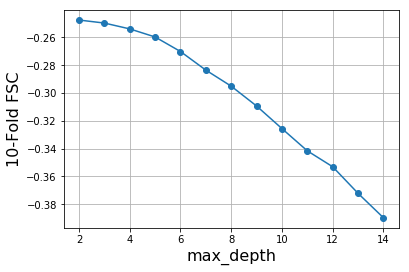

In [51]:
maxDepth = range(2, 15)
param_grid = {'max_depth': maxDepth }

grid = GridSearchCV(DecisionTreeRegressor(random_state = 0),
                    scoring = 'neg_mean_squared_error',
                    param_grid = param_grid,
                    cv = 10)

grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
plt.plot(maxDepth, scores, '-o')
plt.xlabel('max_depth', fontsize = 16)
plt.ylabel('10-Fold FSC', fontsize = 16)
plt.grid()
plt.show()

In [52]:
depthOpt = grid.best_params_['max_depth']

tree = DecisionTreeRegressor(random_state = 0,
                             max_depth = depthOpt).fit(X_train, y_train)
ytrainDecisionTree = tree.predict(X_train)
ytestDecisionTree  = tree.predict(X_test)

mseTrainModelDecisionTree = mean_squared_error(y_train, ytrainDecisionTree)
mseTestModelDecisionTree = mean_squared_error(y_test, ytestDecisionTree)

print('MSE Modelo Decision Tree (train): %0.3g' % mseTrainModelDecisionTree)
print('MSE Modelo Decision Tree (test) : %0.3g' % mseTestModelDecisionTree)
print("R^2 (train): {:.4f}".format(tree.score(X_train, y_train)))
print("R^2 (test): {:.4f}".format(tree.score(X_test, y_test)))

MSE Modelo Decision Tree (train): 0.243
MSE Modelo Decision Tree (test) : 0.246
R^2 (train): 0.0171
R^2 (test): -0.0043


Predecimos valores 2016

In [53]:
y_pred_2016 = tree.predict(X_2016)

In [54]:
y_predict = pd.DataFrame(data2016)
y_predict['RETURNS_vs_INDEX_NEXT_PREDICT'] = y_pred_2016

In [55]:
y_predict.rename(columns={'VQ_MARKET_CAP': 'CAP'}, inplace=True)
y_predict.rename(columns={'IS_EPS_BASIC': 'EPS'}, inplace=True)
y_predict.rename(columns={'IS__REVENUE': 'REVENUE'}, inplace=True)
y_predict.rename(columns={'VR_PE_RATIO': 'PER'}, inplace=True)
y_predict.rename(columns={'VQ__PIOTROSKI_F_SCORE': 'PIOTROSKI'}, inplace=True)

In [56]:
result = y_predict[['YEAR', 'CODE', 'CAP', 'EPS', 'REVENUE', 'PER', 'PIOTROSKI',
               'PRICE_START', 'PRICE_END', 'RETURNS', 'RISK',
                'RETURNS_vs_INDEX_NEXT', 'RETURNS_vs_INDEX_NEXT_PREDICT']]

Salvar resultados

In [57]:
result.to_csv('./Datos/result_DT.csv', sep=',', index=False)

## Random Forest

best mean cross-validation score: 0.562
best parameters: {'max_depth': 9}


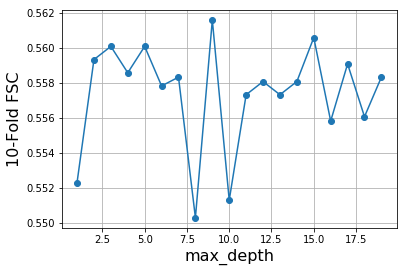

In [61]:
maxDepth   = range(1, 20)
param_grid = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state = 0, n_estimators = 200, max_features = 'sqrt'),
                    param_grid = param_grid, 
                    cv = 10,
                    n_jobs = -1)

grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
plt.plot(maxDepth, scores, '-o')
plt.xlabel('max_depth', fontsize = 16)
plt.ylabel('10-Fold FSC', fontsize = 16)
plt.grid()
plt.show()

In [63]:
depthOpt = grid.best_params_['max_depth']

rf = RandomForestClassifier(random_state = 0,
                           #max_depth = depthOpt,
                           max_depth = 5,
                           n_estimators = 200,
                           max_features = 'sqrt').fit(X_train, y_train)
ytrainRandomForest = rf.predict(X_train)
ytestRandomForest  = rf.predict(X_test)

mseTrainModelRandomForest = mean_squared_error(y_train, ytrainRandomForest)
mseTestModelRandomForest = mean_squared_error(y_test, ytestRandomForest)

print('MSE Modelo Random Forest (train): %0.3g' % mseTrainModelRandomForest)
print('MSE Modelo Random Forest (test) : %0.3g' % mseTestModelRandomForest)
print("R^2 (train): {:.4f}".format(rf.score(X_train, y_train)))
print("R^2 (test): {:.4f}".format(rf.score(X_test, y_test)))

MSE Modelo Random Forest (train): 0.362
MSE Modelo Random Forest (test) : 0.414
R^2 (train): 0.6378
R^2 (test): 0.5859


Predecimos valores 2016

In [64]:
y_pred_2016 = rf.predict(X_2016)
y_prob_2016 = rf.predict_proba(X_2016)
y_prob_2016_high_precision = y_prob_2016[:,1] > 0.8

In [65]:
y_predict = pd.DataFrame(data2016)
y_predict['RETURNS_vs_INDEX_NEXT_PREDICT'] = y_pred_2016
y_predict['RETURNS_vs_INDEX_NEXT_PRECISION'] = y_prob_2016_high_precision

Salvar resultados

In [66]:
y_predict.rename(columns={'VQ_MARKET_CAP': 'CAP'}, inplace=True)
y_predict.rename(columns={'IS_EPS_BASIC': 'EPS'}, inplace=True)
y_predict.rename(columns={'IS__REVENUE': 'REVENUE'}, inplace=True)
y_predict.rename(columns={'VR_PE_RATIO': 'PER'}, inplace=True)
y_predict.rename(columns={'VQ__PIOTROSKI_F_SCORE': 'PIOTROSKI'}, inplace=True)

In [67]:
result = y_predict[['YEAR', 'CODE', 'CAP', 'EPS', 'REVENUE', 'PER', 'PIOTROSKI',
               'PRICE_START', 'PRICE_END', 'RETURNS', 'RISK',
                'RETURNS_vs_INDEX_NEXT', 'RETURNS_vs_INDEX_NEXT_PREDICT', 'RETURNS_vs_INDEX_NEXT_PRECISION']]

In [68]:
result.to_csv('./Datos/result_RF.csv', sep=',', index=False)

## SVM

In [44]:
vectorC = np.logspace(-2, 2, 10)
param_grid = {'C': vectorC}

grid = GridSearchCV(SVC(kernel = 'rbf'), scoring = 'accuracy', param_grid = param_grid, cv = 5, verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

Best mean CV score: {:.3f} 0.5515334338863751
Best parameters: {'C': 0.01}


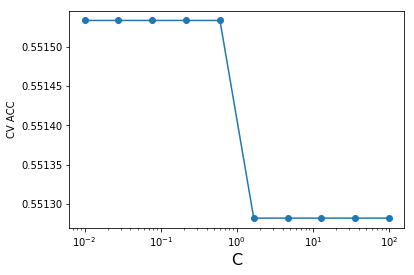

In [45]:
print('Best mean CV score: {:.3f}', format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))

scores = grid.cv_results_['mean_test_score']
plt.semilogx(vectorC, scores, '-o')
plt.xlabel('C', fontsize = 16)
plt.ylabel('CV ACC')
plt.show()

In [40]:
Copt = grid.best_params_['C']
svm = SVC(kernel = 'rbf', C = Copt, probability = True)

svm.fit(X_train, y_train)

print('Acc (TEST): %0.2f'%svm.score(X_test,y_test))

Acc (TEST): 0.57


Probamos con dos parámetros

In [41]:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)
param_grid = {'C': vectorC, 'gamma': vectorG}

grid = GridSearchCV(SVC(kernel = 'rbf'), scoring = 'accuracy', param_grid = param_grid, cv = 5, verbose = 1)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  8.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([1.00000e-02, 2.78256e-02, 7.74264e-02, 2.15443e-01, 5.99484e-01,
       1.66810e+00, 4.64159e+00, 1.29155e+01, 3.59381e+01, 1.00000e+02]), 'gamma': array([1.00000e-05, 7.19686e-05, 5.17947e-04, 3.72759e-03, 2.68270e-02,
       1.93070e-01, 1.38950e+00, 1.00000e+01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [42]:
print('Best mean CV score: {:.3f}', format(grid.best_score_))
print('Best parameters: {}'.format(grid.best_params_))

Best mean CV score: {:.3f} 0.5515334338863751
Best parameters: {'C': 0.01, 'gamma': 1e-05}


In [ ]:
scores = grid.cv_results_['mean_test_score']
plt.semilogx(vectorC, scores, '-o')
plt.xlabel('C', fontsize = 16)
plt.ylabel('CV ACC')
plt.show()

In [43]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svm = SVC(kernel = 'rbf', gamma = Gopt, C = Copt, probability = True)
svm.fit(X_train, y_train)

print('Acc (TEST): %0.2f'%svm.score(X_test,y_test))

Acc (TEST): 0.57


## Gradient Boosting Tree

In [69]:
Niterations = [25, 50, 75, 100, 125, 150, 175, 200, 300]
learningRate = [0.5, 0.1, 0.05, 0.01, 0.005]

param_grid = {'n_estimators': Niterations, 'learning_rate': learningRate}
grid = GridSearchCV(GradientBoostingClassifier(random_state = 0, max_depth = 5),
                    #scoring = 'neg_mean_squared_error', 
                    param_grid = param_grid,
                    cv = 5,
                    n_jobs = -1)

grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.552
best parameters: {'learning_rate': 0.1, 'n_estimators': 300}


In [76]:
learningRateOpt = grid.best_params_['learning_rate']
nEstimatorsOpt = grid.best_params_['n_estimators']

bf = GradientBoostingClassifier(random_state = 0,
                               max_depth = 5,
                               #learning_rate = learningRateOpt,
                               #n_estimators = nEstimatorsOpt,
                               learning_rate = 0.01,
                               n_estimators = 150,
                               max_features = 'sqrt').fit(X_train, y_train)
ytrainBoostingForest = bf.predict(X_train)
ytestBoostingForest  = bf.predict(X_test)

mseTrainModelBoostingForest = mean_squared_error(y_train, ytrainBoostingForest)
mseTestModelBoostingForest = mean_squared_error(y_test, ytestBoostingForest)

print('MSE Modelo Boosting Forest (train): %0.3g' % mseTrainModelBoostingForest)
print('MSE Modelo Boosting Forest (test) : %0.3g' % mseTestModelBoostingForest)
print("R^2 (train): {:.4f}".format(bf.score(X_train, y_train)))
print("R^2 (test): {:.4f}".format(bf.score(X_test, y_test)))

MSE Modelo Boosting Forest (train): 0.321
MSE Modelo Boosting Forest (test) : 0.415
R^2 (train): 0.6795
R^2 (test): 0.5849


Predecimos valores 2016

In [77]:
y_pred_2016 = bf.predict(X_2016)
y_prob_2016 = bf.predict_proba(X_2016)
y_prob_2016_high_precision = y_prob_2016[:,1] > 0.8

In [78]:
y_predict = pd.DataFrame(data2016)
y_predict['RETURNS_vs_INDEX_NEXT_PREDICT'] = y_pred_2016
y_predict['RETURNS_vs_INDEX_NEXT_PRECISION'] = y_prob_2016_high_precision

In [79]:
y_predict.rename(columns={'VQ_MARKET_CAP': 'CAP'}, inplace=True)
y_predict.rename(columns={'IS_EPS_BASIC': 'EPS'}, inplace=True)
y_predict.rename(columns={'IS__REVENUE': 'REVENUE'}, inplace=True)
y_predict.rename(columns={'VR_PE_RATIO': 'PER'}, inplace=True)
y_predict.rename(columns={'VQ__PIOTROSKI_F_SCORE': 'PIOTROSKI'}, inplace=True)

Salvar resultados

In [80]:
result = y_predict[['YEAR', 'CODE', 'CAP', 'EPS', 'REVENUE', 'PER', 'PIOTROSKI',
               'PRICE_START', 'PRICE_END', 'RETURNS', 'RISK',
                'RETURNS_vs_INDEX_NEXT', 'RETURNS_vs_INDEX_NEXT_PREDICT', 'RETURNS_vs_INDEX_NEXT_PRECISION']]

In [81]:
result.to_csv('./Datos/result_BF.csv', sep=',', index=False)

### Deep Learning

In [187]:
'''
import tensorflow as tf
import keras
import numpy as np
import pandas as pd 
from keras import backend as K
# K.tensorflow_backend._get_available_gpus()
K.tensorflow_backend._get_available_gpus()
'''

['/job:localhost/replica:0/task:0/device:GPU:0']

In [82]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [83]:
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

In [108]:
# create model
model = Sequential()
model.add(Dense(50, input_dim=27, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [109]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(lr=0.001, decay=1e-6),
              metrics=['acc'])

In [110]:
# Determinmos como sera el checkpoint del modelo
filepath = './Datos/output/model-ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5'
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

In [111]:
history = model.fit(X_train, y_train,
                    batch_size=10,
                    epochs=300,
                    callbacks=[checkpoint], 
                    validation_data = (X_test, y_test),
                    verbose=2)


Train on 3978 samples, validate on 995 samples
Epoch 1/300
 - 2s - loss: 0.7595 - acc: 0.5204 - val_loss: 0.7307 - val_acc: 0.5538

Epoch 00001: val_loss improved from inf to 0.73072, saving model to ./Datos/output/model-ep001-loss0.759-val_loss0.731.h5
Epoch 2/300
 - 2s - loss: 0.6963 - acc: 0.5468 - val_loss: 0.6942 - val_acc: 0.5729

Epoch 00002: val_loss improved from 0.73072 to 0.69415, saving model to ./Datos/output/model-ep002-loss0.696-val_loss0.694.h5
Epoch 3/300
 - 2s - loss: 0.6896 - acc: 0.5490 - val_loss: 0.6985 - val_acc: 0.5688

Epoch 00003: val_loss did not improve from 0.69415
Epoch 4/300
 - 2s - loss: 0.6885 - acc: 0.5540 - val_loss: 0.6991 - val_acc: 0.5719

Epoch 00004: val_loss did not improve from 0.69415
Epoch 5/300
 - 2s - loss: 0.6872 - acc: 0.5546 - val_loss: 0.6952 - val_acc: 0.5658

Epoch 00005: val_loss did not improve from 0.69415
Epoch 6/300
 - 2s - loss: 0.6848 - acc: 0.5556 - val_loss: 0.6849 - val_acc: 0.5789

Epoch 00006: val_loss improved from 0.6941


Epoch 00057: val_loss did not improve from 0.68206
Epoch 58/300
 - 2s - loss: 0.6749 - acc: 0.5714 - val_loss: 0.6869 - val_acc: 0.5568

Epoch 00058: val_loss did not improve from 0.68206
Epoch 59/300
 - 2s - loss: 0.6723 - acc: 0.5782 - val_loss: 0.6861 - val_acc: 0.5648

Epoch 00059: val_loss did not improve from 0.68206
Epoch 60/300
 - 2s - loss: 0.6721 - acc: 0.5875 - val_loss: 0.6869 - val_acc: 0.5658

Epoch 00060: val_loss did not improve from 0.68206
Epoch 61/300
 - 2s - loss: 0.6719 - acc: 0.5845 - val_loss: 0.6872 - val_acc: 0.5618

Epoch 00061: val_loss did not improve from 0.68206
Epoch 62/300
 - 2s - loss: 0.6717 - acc: 0.5887 - val_loss: 0.6900 - val_acc: 0.5558

Epoch 00062: val_loss did not improve from 0.68206
Epoch 63/300
 - 2s - loss: 0.6722 - acc: 0.5809 - val_loss: 0.6880 - val_acc: 0.5598

Epoch 00063: val_loss did not improve from 0.68206
Epoch 64/300
 - 2s - loss: 0.6723 - acc: 0.5787 - val_loss: 0.6843 - val_acc: 0.5417

Epoch 00064: val_loss did not improve fr


Epoch 00116: val_loss did not improve from 0.68028
Epoch 117/300
 - 2s - loss: 0.6660 - acc: 0.5938 - val_loss: 0.7020 - val_acc: 0.5487

Epoch 00117: val_loss did not improve from 0.68028
Epoch 118/300
 - 2s - loss: 0.6679 - acc: 0.5845 - val_loss: 0.6920 - val_acc: 0.5568

Epoch 00118: val_loss did not improve from 0.68028
Epoch 119/300
 - 2s - loss: 0.6632 - acc: 0.5963 - val_loss: 0.6964 - val_acc: 0.5618

Epoch 00119: val_loss did not improve from 0.68028
Epoch 120/300
 - 2s - loss: 0.6673 - acc: 0.5940 - val_loss: 0.6988 - val_acc: 0.5638

Epoch 00120: val_loss did not improve from 0.68028
Epoch 121/300
 - 2s - loss: 0.6699 - acc: 0.5850 - val_loss: 0.7001 - val_acc: 0.5638

Epoch 00121: val_loss did not improve from 0.68028
Epoch 122/300
 - 2s - loss: 0.6659 - acc: 0.5852 - val_loss: 0.6995 - val_acc: 0.5457

Epoch 00122: val_loss did not improve from 0.68028
Epoch 123/300
 - 2s - loss: 0.6643 - acc: 0.5905 - val_loss: 0.6982 - val_acc: 0.5648

Epoch 00123: val_loss did not imp

 - 2s - loss: 0.6634 - acc: 0.5850 - val_loss: 0.7022 - val_acc: 0.5467

Epoch 00176: val_loss did not improve from 0.68028
Epoch 177/300
 - 2s - loss: 0.6625 - acc: 0.5958 - val_loss: 0.6986 - val_acc: 0.5367

Epoch 00177: val_loss did not improve from 0.68028
Epoch 178/300
 - 2s - loss: 0.6668 - acc: 0.5905 - val_loss: 0.7004 - val_acc: 0.5648

Epoch 00178: val_loss did not improve from 0.68028
Epoch 179/300
 - 2s - loss: 0.6664 - acc: 0.5870 - val_loss: 0.7081 - val_acc: 0.5548

Epoch 00179: val_loss did not improve from 0.68028
Epoch 180/300
 - 2s - loss: 0.6593 - acc: 0.5973 - val_loss: 0.7001 - val_acc: 0.5397

Epoch 00180: val_loss did not improve from 0.68028
Epoch 181/300
 - 2s - loss: 0.6624 - acc: 0.5887 - val_loss: 0.6876 - val_acc: 0.5437

Epoch 00181: val_loss did not improve from 0.68028
Epoch 182/300
 - 2s - loss: 0.6587 - acc: 0.6091 - val_loss: 0.7114 - val_acc: 0.5578

Epoch 00182: val_loss did not improve from 0.68028
Epoch 183/300
 - 2s - loss: 0.6612 - acc: 0.5948


Epoch 00235: val_loss did not improve from 0.68028
Epoch 236/300
 - 2s - loss: 0.6606 - acc: 0.6033 - val_loss: 0.6943 - val_acc: 0.5618

Epoch 00236: val_loss did not improve from 0.68028
Epoch 237/300
 - 2s - loss: 0.6577 - acc: 0.6046 - val_loss: 0.6887 - val_acc: 0.5457

Epoch 00237: val_loss did not improve from 0.68028
Epoch 238/300
 - 2s - loss: 0.6576 - acc: 0.6051 - val_loss: 0.6900 - val_acc: 0.5568

Epoch 00238: val_loss did not improve from 0.68028
Epoch 239/300
 - 2s - loss: 0.6592 - acc: 0.5895 - val_loss: 0.6892 - val_acc: 0.5367

Epoch 00239: val_loss did not improve from 0.68028
Epoch 240/300
 - 2s - loss: 0.6563 - acc: 0.5998 - val_loss: 0.6896 - val_acc: 0.5407

Epoch 00240: val_loss did not improve from 0.68028
Epoch 241/300
 - 2s - loss: 0.6563 - acc: 0.6011 - val_loss: 0.6905 - val_acc: 0.5387

Epoch 00241: val_loss did not improve from 0.68028
Epoch 242/300
 - 2s - loss: 0.6544 - acc: 0.6096 - val_loss: 0.6801 - val_acc: 0.5668

Epoch 00242: val_loss improved fr


Epoch 00293: val_loss did not improve from 0.67826
Epoch 294/300
 - 2s - loss: 0.6548 - acc: 0.5993 - val_loss: 0.6950 - val_acc: 0.5729

Epoch 00294: val_loss did not improve from 0.67826
Epoch 295/300
 - 2s - loss: 0.6538 - acc: 0.6184 - val_loss: 0.6959 - val_acc: 0.5739

Epoch 00295: val_loss did not improve from 0.67826
Epoch 296/300
 - 2s - loss: 0.6551 - acc: 0.6006 - val_loss: 0.6951 - val_acc: 0.5749

Epoch 00296: val_loss did not improve from 0.67826
Epoch 297/300
 - 2s - loss: 0.6499 - acc: 0.6088 - val_loss: 0.6824 - val_acc: 0.5688

Epoch 00297: val_loss did not improve from 0.67826
Epoch 298/300
 - 2s - loss: 0.6542 - acc: 0.6114 - val_loss: 0.6948 - val_acc: 0.5678

Epoch 00298: val_loss did not improve from 0.67826
Epoch 299/300
 - 2s - loss: 0.6510 - acc: 0.6104 - val_loss: 0.6900 - val_acc: 0.5618

Epoch 00299: val_loss did not improve from 0.67826
Epoch 300/300
 - 2s - loss: 0.6489 - acc: 0.6134 - val_loss: 0.6880 - val_acc: 0.5739

Epoch 00300: val_loss did not imp

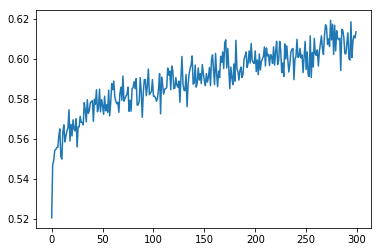

In [112]:
# plot metrics
plt.plot(history.history['acc'])
plt.show()

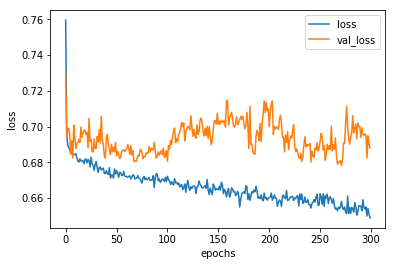

In [113]:
# Comprobamos resultado del modelo
for label in ["loss","val_loss"]:
    plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [114]:
# Cargamos el modelo con los pesos optimos
filename = './Datos/output/model-ep272-loss0.658-val_loss0.678.h5'
model = load_model(filename)

In [115]:
# Evaluamos el modelo
model.evaluate(X_test, y_test)

995/995 [==============================] - 0s 151us/step


[0.6782614367691117, 0.5728643216679443]

In [116]:
y_pred_2016 = model.predict(X_2016)
y_prob_2016 = model.predict_proba(X_2016)
y_prob_2016_high_precision = y_prob_2016 > 0.8

In [117]:
y_predict.rename(columns={'VQ_MARKET_CAP': 'CAP'}, inplace=True)
y_predict.rename(columns={'IS_EPS_BASIC': 'EPS'}, inplace=True)
y_predict.rename(columns={'IS__REVENUE': 'REVENUE'}, inplace=True)
y_predict.rename(columns={'VR_PE_RATIO': 'PER'}, inplace=True)
y_predict.rename(columns={'VQ__PIOTROSKI_F_SCORE': 'PIOTROSKI'}, inplace=True)

In [118]:
result = y_predict[['YEAR', 'CODE', 'CAP', 'EPS', 'REVENUE', 'PER', 'PIOTROSKI',
               'PRICE_START', 'PRICE_END', 'RETURNS', 'RISK',
                'RETURNS_vs_INDEX_NEXT', 'RETURNS_vs_INDEX_NEXT_PREDICT', 'RETURNS_vs_INDEX_NEXT_PRECISION']]

Salvar resultados

In [119]:
result.to_csv('./Datos/result_DL.csv', sep=',', index=False)